# Analysis of GT data related to magical thinking in response to Brexit referendum

In [1]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
import time


In [13]:
# List of keywords generated from Chatgpt
keywords = [
    "Astrology",
    "Horoscope",
    "Fortune telling",
    "Psychic",
    "Tarot reading",
    "Numerology",
    "Palm reading",
    "Clairvoyant",
    "Crystal ball",
    "Magic spells",
    "Occult",
    "Spiritual healing",
    "Witchcraft",
    "Mediumship",
    "Superstition"
]

In [14]:
# just load the data
trends_data_UK = pd.read_csv('google_trends_data_bref.csv', parse_dates=True, index_col='date')
trends_data_US = pd.read_csv('merged_trends_data_US.csv', parse_dates=True, index_col='date')

In [15]:
#take a look
trends_data_UK.head()

,Astrology,Horoscope,Fortune telling,Psychic,Tarot reading,Numerology,Palm reading,Clairvoyant,Crystal ball,Magic spells,Occult,Spiritual healing,Witchcraft,Mediumship,Superstition
date,,,,,,,,,,,,,,,
2015-06-21,56,63,0,66,96,52,47,45,41,64,80,0,55,0,58
2015-06-28,71,70,45,63,88,46,73,56,55,61,73,62,49,0,49
2015-07-05,58,66,35,70,91,62,58,61,45,100,68,45,48,0,65
2015-07-12,65,71,67,67,94,62,59,52,60,89,72,89,55,0,59
2015-07-19,60,66,53,69,85,56,55,55,40,64,56,55,52,0,58


In [11]:
#summary statistics
trends_data_UK.describe()

,Astrology,Horoscope,Fortune telling,Psychic,Tarot reading,Numerology,Palm reading,Clairvoyant,Crystal ball,Magic spells,Occult,Spiritual healing,Witchcraft,Mediumship,Superstition
count,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000,105.000000
mean,59.152381,60.857143,29.000000,75.028571,77.133333,58.571429,53.685714,60.152381,49.876190,55.476190,71.028571,53.914286,62.780952,23.219048,59.933333
std,8.076296,6.905166,26.646908,7.359527,11.190713,9.597533,12.831987,11.204207,9.515873,13.233913,9.611149,25.241950,11.979133,32.297589,10.356405
min,46.000000,51.000000,0.000000,62.000000,53.000000,44.000000,26.000000,38.000000,32.000000,32.000000,47.000000,0.000000,37.000000,0.000000,35.000000
25%,54.000000,57.000000,0.000000,70.000000,68.000000,53.000000,46.000000,53.000000,43.000000,45.000000,65.000000,45.000000,55.000000,0.000000,54.000000
50%,58.000000,60.000000,36.000000,74.000000,79.000000,57.000000,53.000000,59.000000,49.000000,55.000000,70.000000,59.000000,60.000000,0.000000,58.000000
75%,62.000000,63.000000,47.000000,79.000000,85.000000,62.000000,60.000000,66.000000,55.000000,64.000000,75.000000,70.000000,70.000000,58.000000,64.000000
max,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000


In [ ]:
# Plotting the data
def plot_trends(data, keywords, vline_date=None):
    plt.figure(figsize=(12, 6))
    for keyword in keywords:
        topic_data = data[keyword]
        plt.plot(topic_data.index, topic_data, label=keyword)
    
    # Check if a vertical line date is provided
    if vline_date:
        # Convert the string date to datetime if your index is in datetime format
        vline_datetime = pd.to_datetime(vline_date)
        plt.axvline(x=vline_datetime, color='k', linestyle='--', label='Brexit referendum')
    
    plt.title('Google Trends Data')
    plt.xlabel('Date')
    plt.ylabel('Interest Over Time')
    plt.legend()
    plt.show()



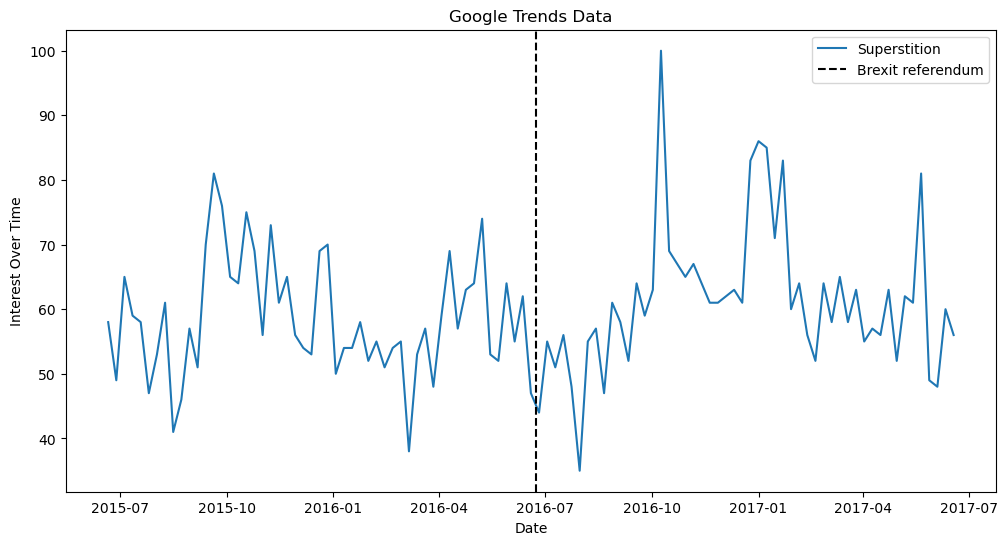

In [17]:
# add a vertical line to show the date of the referendum
bref_date = '2016-06-23'

# example plots for data exploration (can change the keyword and dataset)
plot_trends(trends_data_UK, ["Superstition"], bref_date)


notes:
horoscope has a yearly peak at new year

In [18]:
def compute_means(data):
        # Split the data into before and after the specified date
        data_before = data[data.index < bref_date]
        data_after = data[data.index >= bref_date]

        # Calculate the mean values for each keyword before and after the split date
        means_before = data_before.mean()
        means_after = data_after.mean()

        # Create a new DataFrame to store the mean values
        means = pd.DataFrame({
            'Mean Before 2016-06-23': means_before,
            'Mean After 2016-06-23': means_after
        })

        return means


In [26]:
means_UK = compute_means(trends_data_UK)
means_US = compute_means(trends_data_US)

# Display the new DataFrame
print(means_UK)


                   Mean Before 2016-06-23  Mean After 2016-06-23
Astrology                       62.490566              55.750000
Horoscope                       63.264151              58.403846
Fortune telling                 36.415094              21.442308
Psychic                         73.584906              76.500000
Tarot reading                   85.037736              69.076923
Numerology                      56.924528              60.250000
Palm reading                    57.132075              50.173077
Clairvoyant                     62.245283              58.019231
Crystal ball                    51.773585              47.942308
Magic spells                    61.584906              49.250000
Occult                          70.000000              72.076923
Spiritual healing               56.452830              51.326923
Witchcraft                      65.037736              60.480769
Mediumship                      23.811321              22.615385
Superstition             

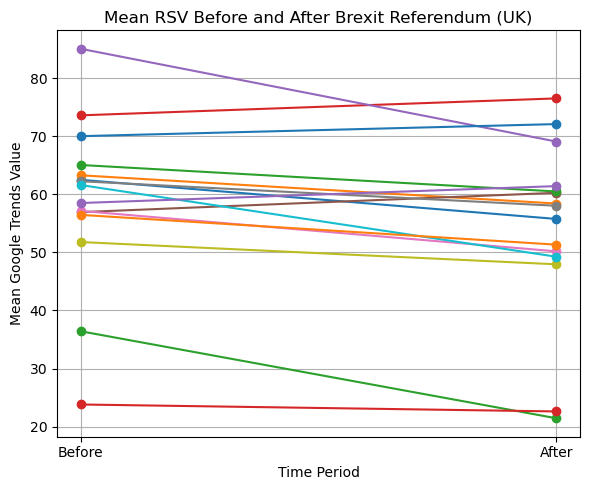

In [30]:
# Plotting the mean values
plt.figure(figsize=(6, 5))
for keyword in means_UK.index:
    plt.plot(['Before', 'After'], means_UK.loc[keyword], marker='o', label=keyword)

# Adding titles and labels
plt.title('Mean RSV Before and After Brexit Referendum (UK)')
plt.xlabel('Time Period')
plt.ylabel('Mean Google Trends Value')
plt.grid(True)
plt.tight_layout()

# Display the plot
#plt.legend(title='Keywords', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


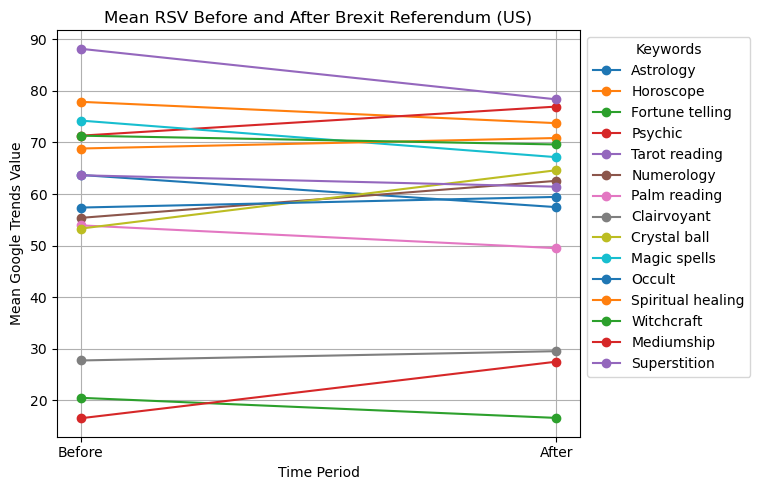

In [28]:
# Plotting the mean values
plt.figure(figsize=(6, 5))
for keyword in means_US.index:
    plt.plot(['Before', 'After'], means_US.loc[keyword], marker='o', label=keyword)

# Adding titles and labels
plt.title('Mean RSV Before and After Brexit Referendum (US)')
plt.xlabel('Time Period')
plt.ylabel('Mean Google Trends Value')
plt.grid(True)
plt.tight_layout()

# Display the plot
plt.legend(title='Keywords', bbox_to_anchor=(1.0, 1), loc='upper left')
plt.show()


In [35]:
def compute_diff(data):
        # Split the data into before and after the specified date
        data_before = data[data.index < bref_date]
        data_after = data[data.index >= bref_date]

        # Calculate the mean values for each keyword before and after the split date
        means_before = data_before.mean()
        means_after = data_after.mean()

        # Create a new DataFrame to store the mean values
        means = pd.DataFrame({
            'Difference': means_after-means_before
        })

        return means

In [38]:
diff_US = compute_diff(trends_data_US)
diff_UK = compute_diff(trends_data_UK)

# Display the new DataFrame
print(diff_US)
count_positive_differences = (diff_UK['Difference'] > 0).sum()
print(count_positive_differences)

                   Difference
Astrology           -6.236575
Horoscope           -4.136792
Fortune telling     -3.894775
Psychic              5.640784
Tarot reading       -9.804427
Numerology           7.180334
Palm reading        -4.424528
Clairvoyant          1.802250
Crystal ball        11.313498
Magic spells        -7.091437
Occult               2.064949
Spiritual healing    2.035196
Witchcraft          -1.705370
Mediumship          10.971335
Superstition        -2.218433
4


In [ ]:
import yfinance as yf

# Fetch USD to GBP exchange rate data from Yahoo Finance
exchange_rate = yf.download('GBPUSD=X', start='2015-06-23', end='2017-06-23')
exchange_rate = exchange_rate['Close']  # Get the closing price (exchange rate)

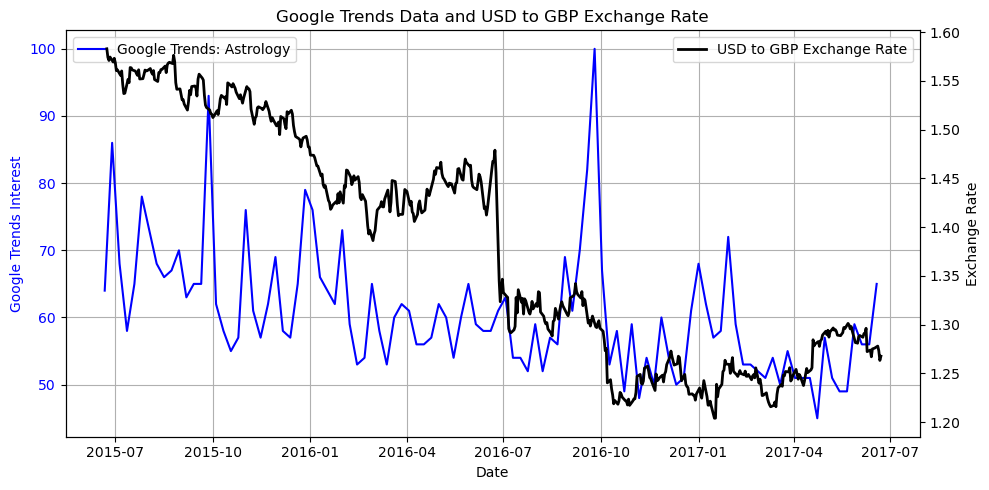

In [45]:
# Plotting all time series along with the exchange rate
keyword = 'Astrology'  # Replace with the keyword you want to plot

fig, ax1 = plt.subplots(figsize=(10, 5))

# Plot Google Trends data on primary y-axis
ax1.plot(trends_data_UK.index, trends_data_UK[keyword], label=f'Google Trends: {keyword}', color='blue')
ax1.set_xlabel('Date')
ax1.set_ylabel('Google Trends Interest', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# Create a secondary y-axis to plot exchange rate data
ax2 = ax1.twinx()
ax2.plot(exchange_rate.index, exchange_rate, label='USD to GBP Exchange Rate', color='black', linewidth=2)
ax2.set_ylabel('Exchange Rate', color='black')
ax2.tick_params(axis='y', labelcolor='black')

# Adding titles and grid
plt.title('Google Trends Data and USD to GBP Exchange Rate')
ax1.grid(True)
fig.tight_layout()

# Adding legends
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')

# Display the plot
plt.show()

In [12]:
exchange_rate.head()

Date
2015-06-23    1.582930
2015-06-24    1.574109
2015-06-25    1.570993
2015-06-26    1.574506
2015-06-29    1.569317
Name: Close, dtype: float64